In [1]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from functools import partial
from os.path import expanduser
from tqdm import tqdm

from surround.image_processing import *
from surround.data_handling import *
from surround.efficient_coding import *
from aesthetics.plotting import *
from surround.modeling import gaussian, difference_of_gaussians

import pyret.filtertools as ft
from sklearn.decomposition import PCA
from scipy.stats import sem
from scipy.optimize import curve_fit, minimize
from scipy.interpolate import interp1d

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Changes from previous versions:
- Constrain spacing by photoreceptor spacing
- Constrain width by visual field of salamander retina  
- Constrain output power instead of output variance

### Signal

In [2]:
# choose an image path from cd13A (flood plain, water, horizon) or cd01A (baboons, trees, bushes)
im_path     = expanduser('~/data/images/Tkacik/cd01A')
num_images  = 100
patch_size  = None
pixelsToDeg = 92./2 # or 2./92 degrees per pixel (spacing)
spacing     = 1./pixelsToDeg # number of degree spacing between pixels
normalize   = 'divisive'
contrast    = 0.35
patches     = load_images(im_path, num_images, patch_size, square=True, 
                          normalize=normalize, effective_contrast=contrast)
signal_amps, signal_freqs, signal_sem = averageAmplitudeSpectrum2d(patches, spacing=spacing)

Only 70 files in directory.


### Empirical covariance matrices of the signal

In [10]:
cov = np.dot(patches[0] - np.mean(patches[0]), patches[0].T - np.mean(patches[0]))

In [11]:
cov.shape

(1006, 1006)

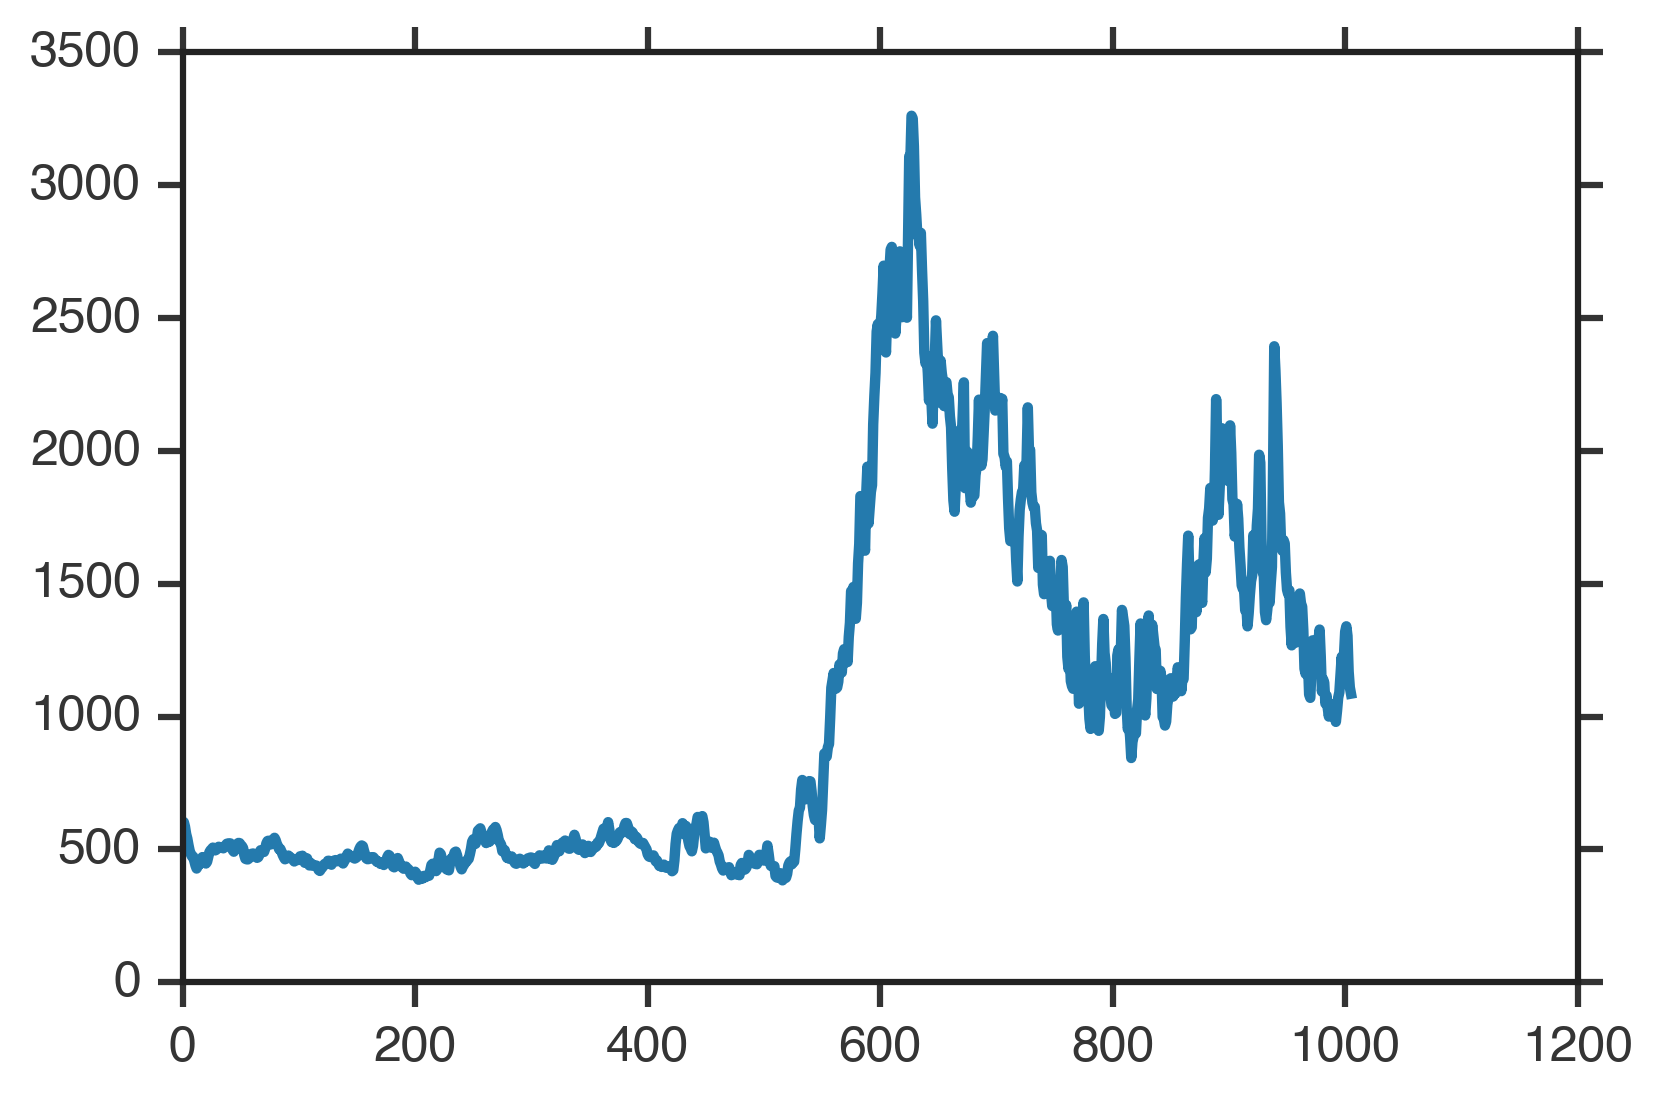

In [12]:
plt.plot(np.diag(cov))

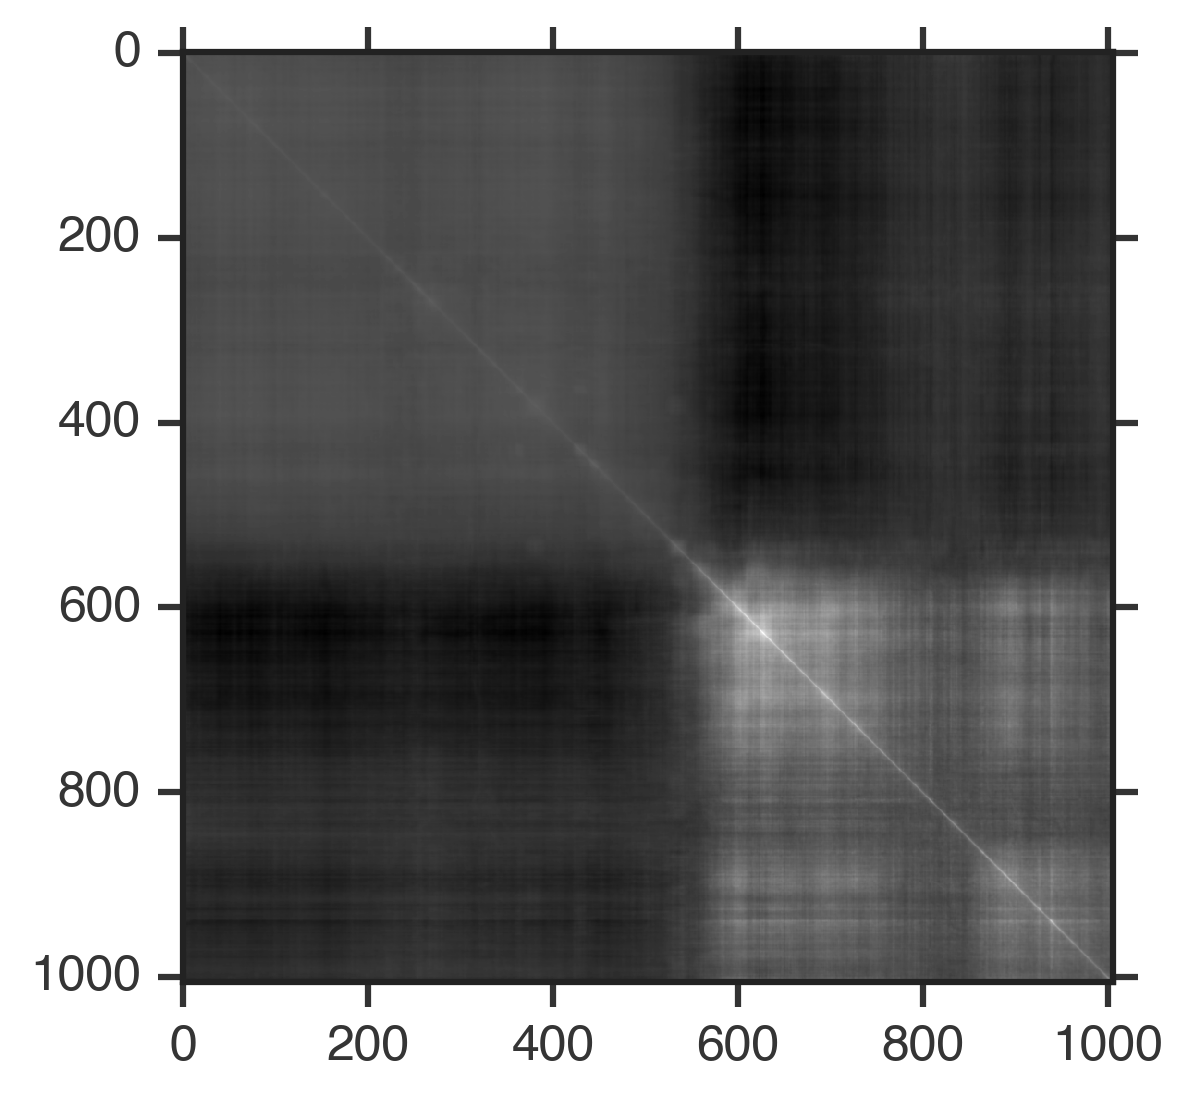

In [13]:
plt.imshow(cov)

In [14]:
covariance_matrices = []
for p in patches:
    covariance_matrices.append(np.dot(p - np.mean(p), p.T - np.mean(p)))

In [16]:
avg_cov_matrix = np.mean(np.stack(covariance_matrices), axis=0)

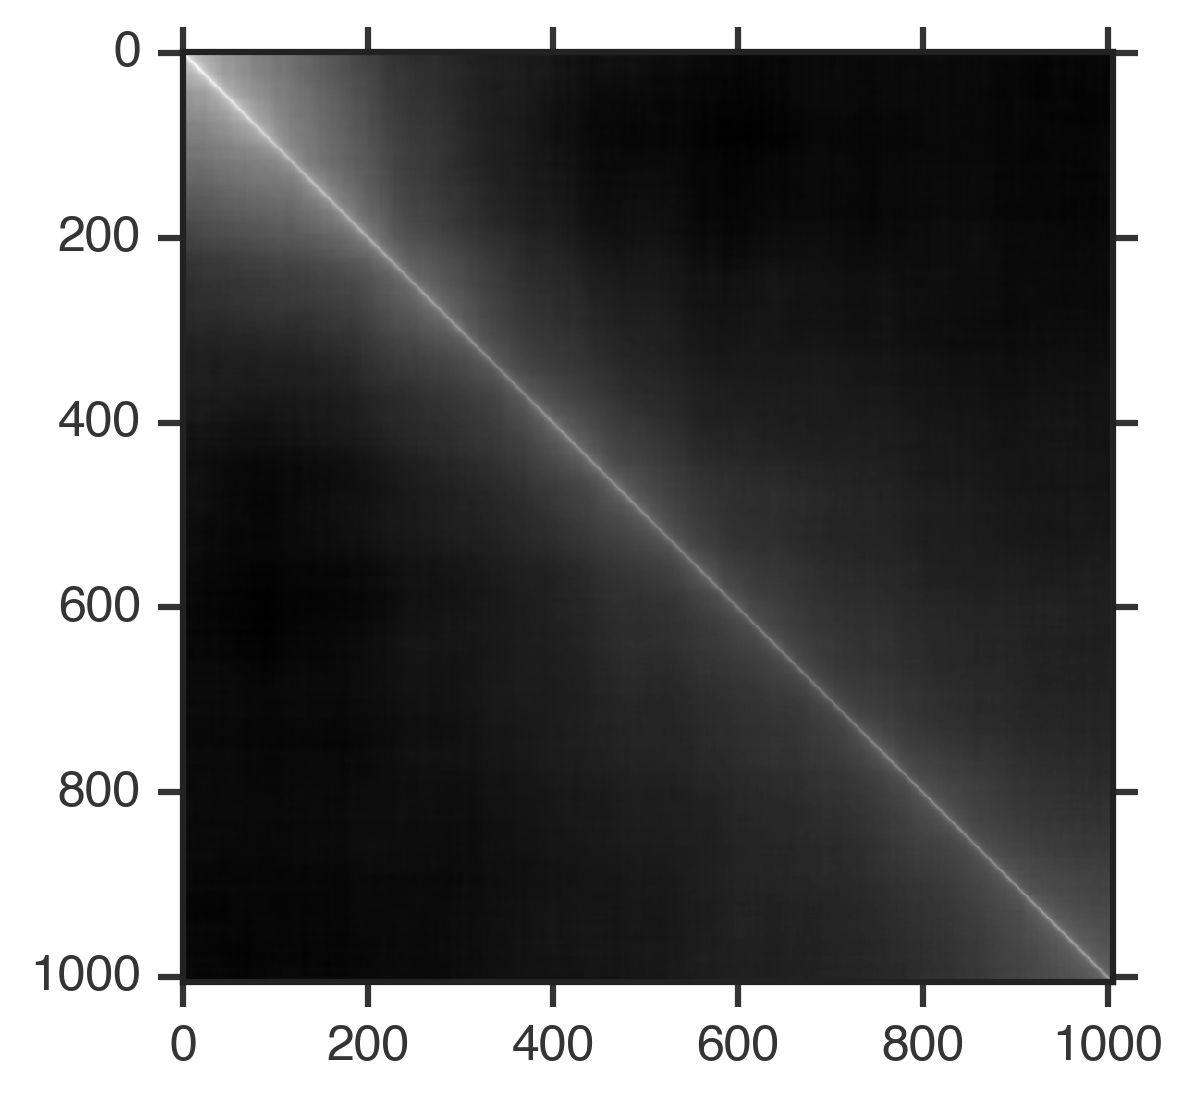

In [17]:
plt.imshow(avg_cov_matrix)

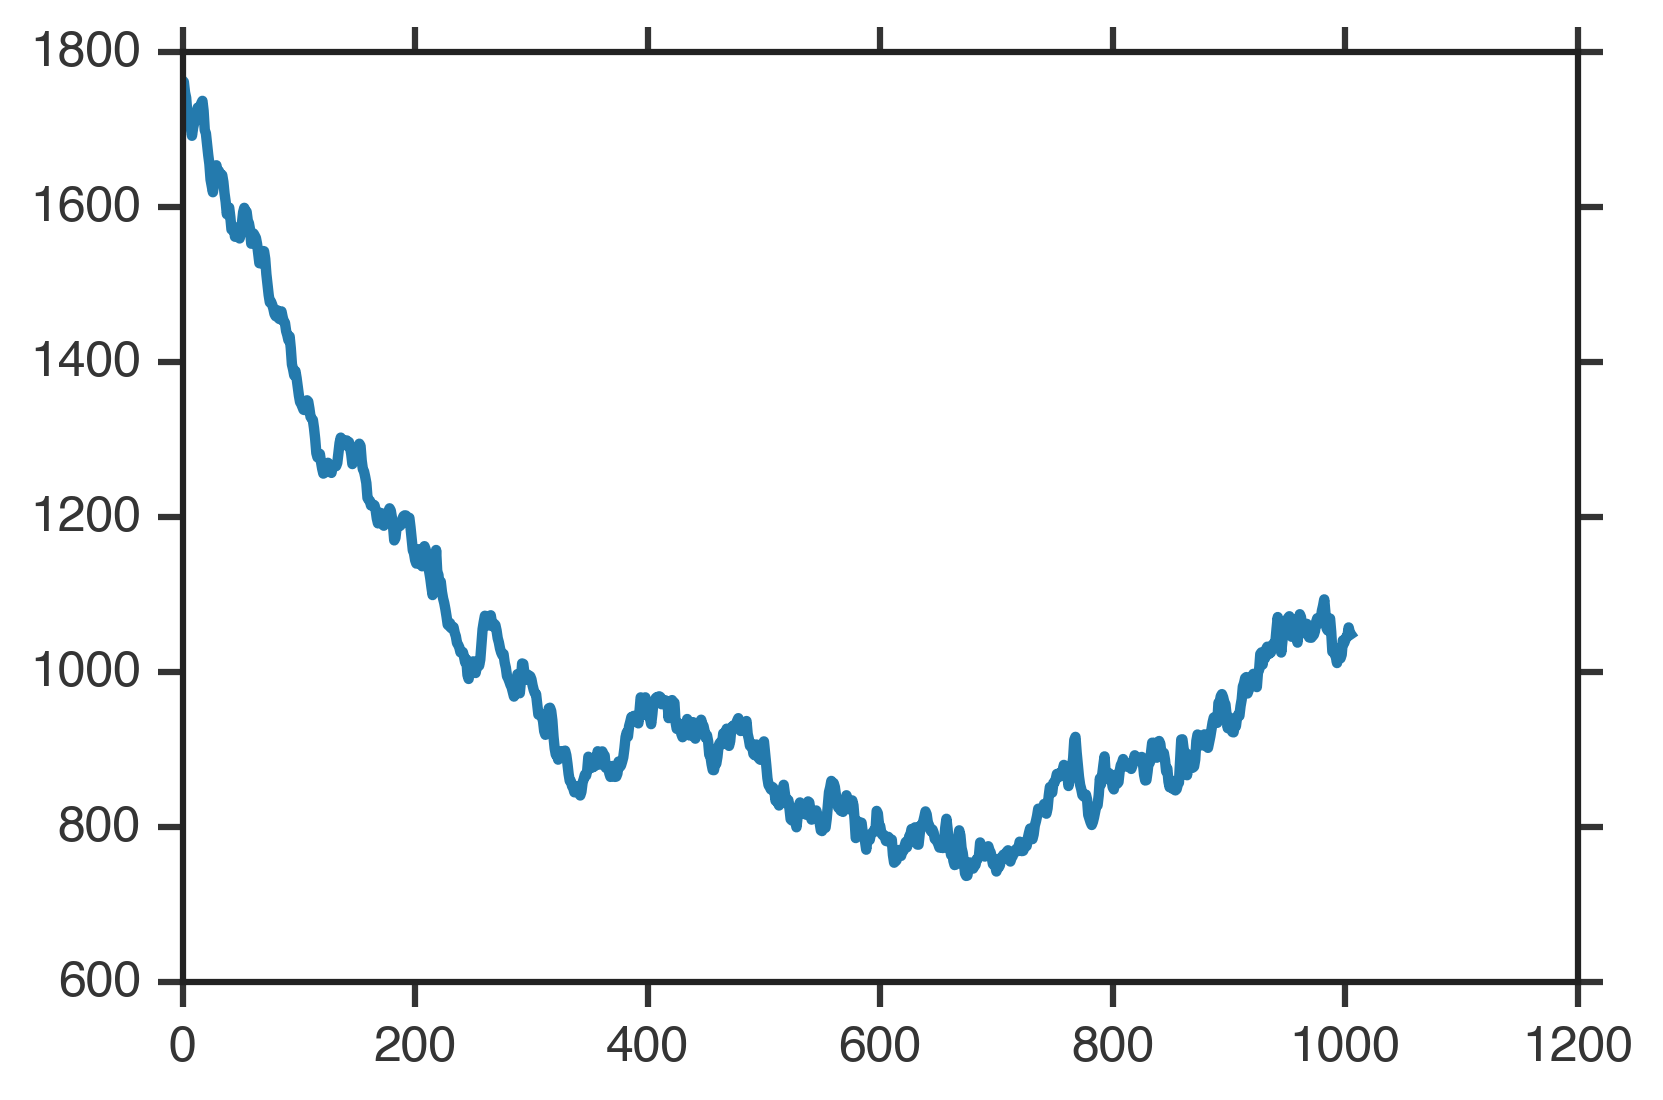

In [18]:
plt.plot(np.diag(avg_cov_matrix))

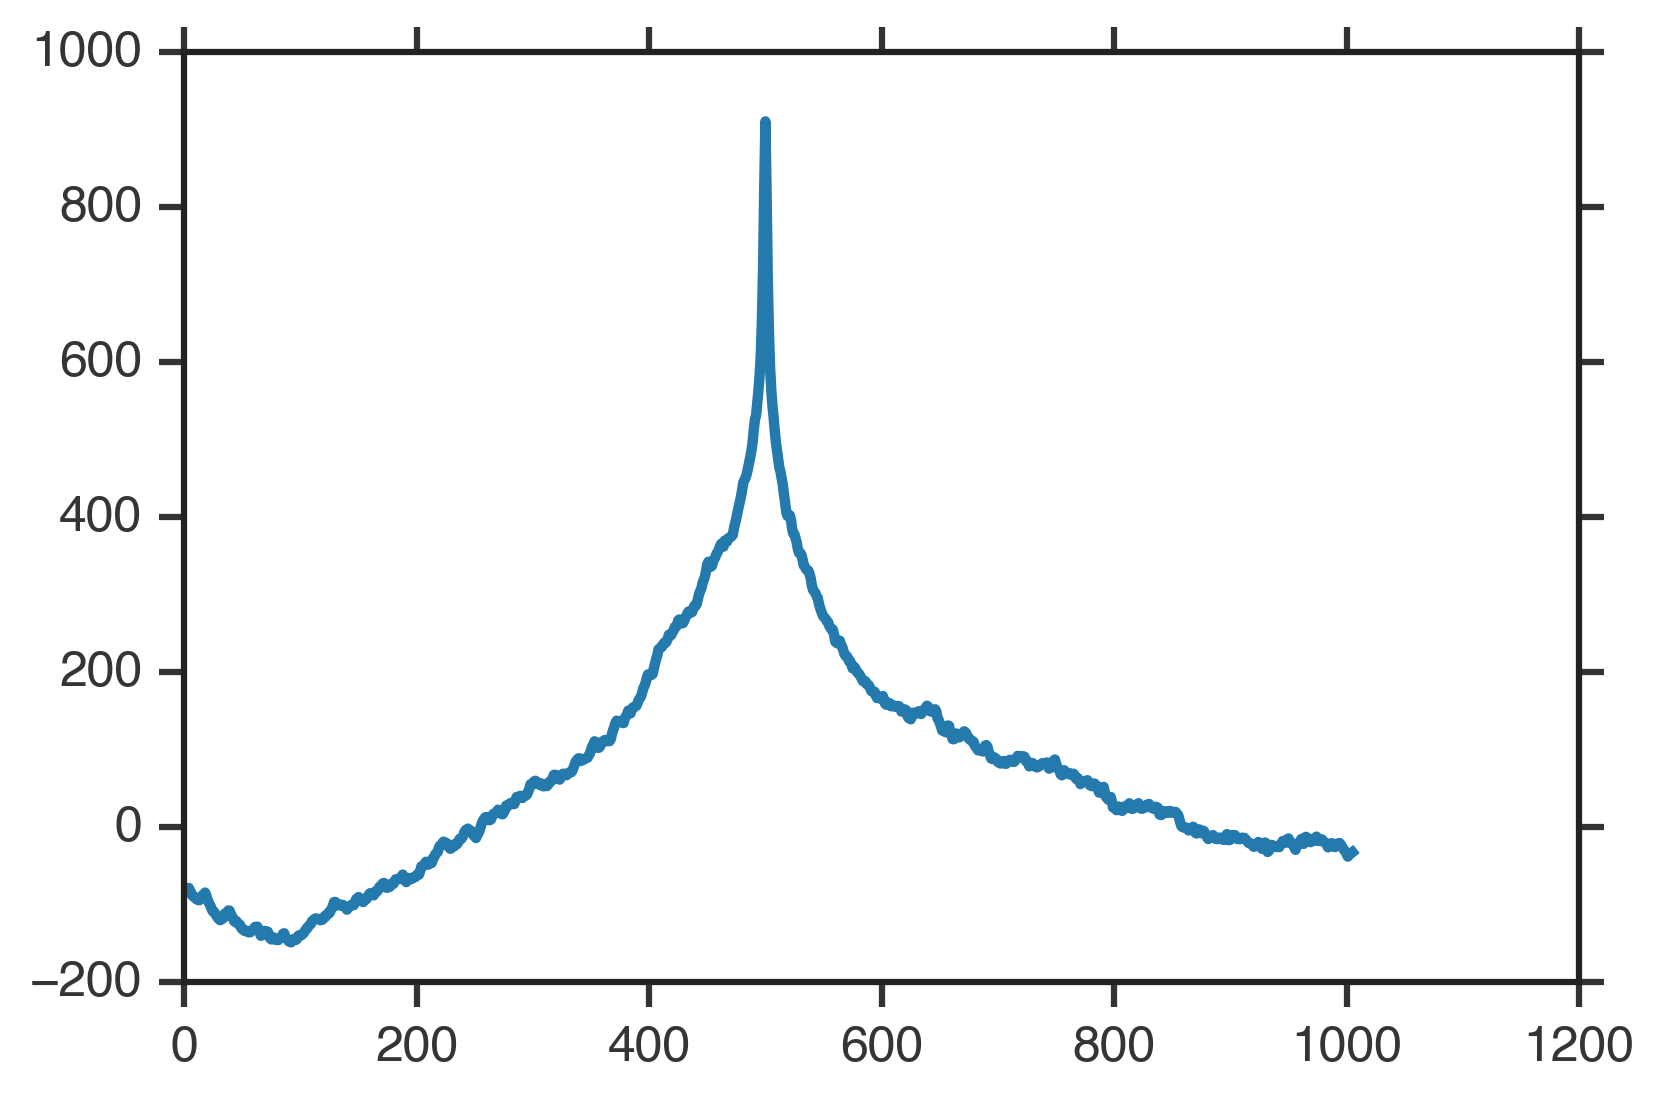

In [21]:
plt.plot(avg_cov_matrix[500,:])

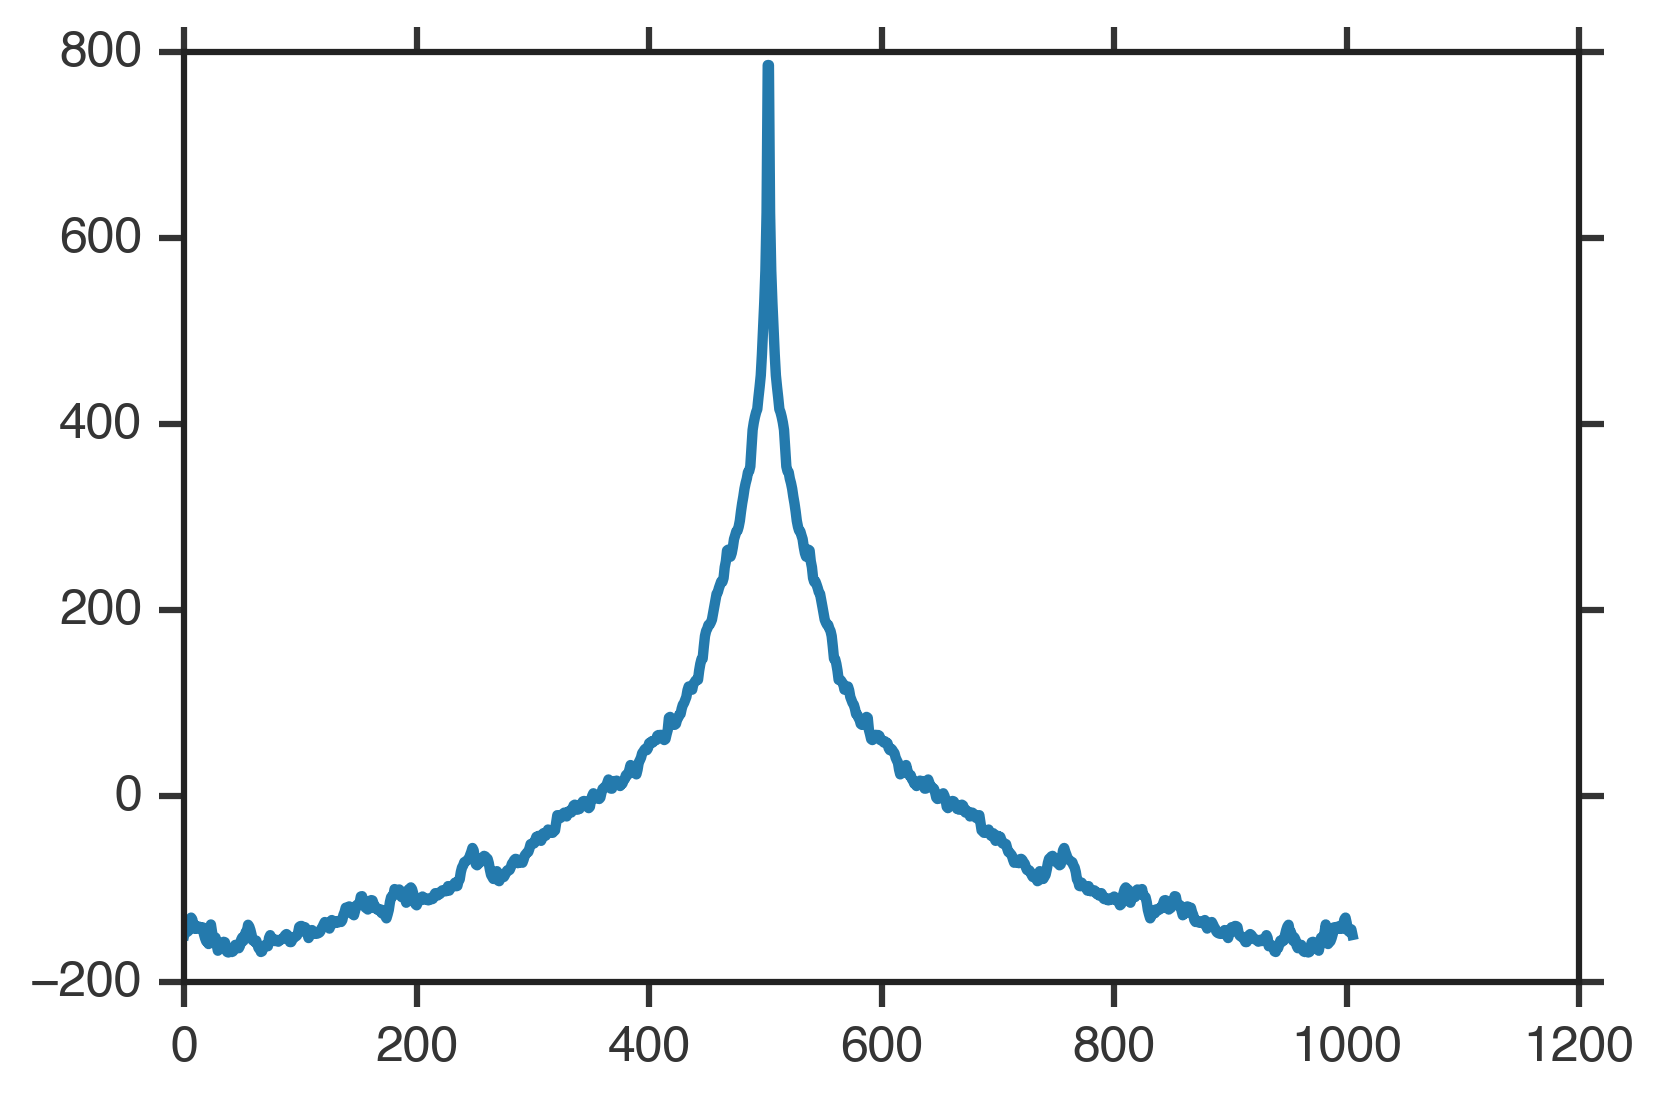

In [37]:
plt.plot(avg_cov_matrix[range(1006),sorted(range(1006), reverse=True)])

In [22]:
w, v = np.linalg.eig(avg_cov_matrix)

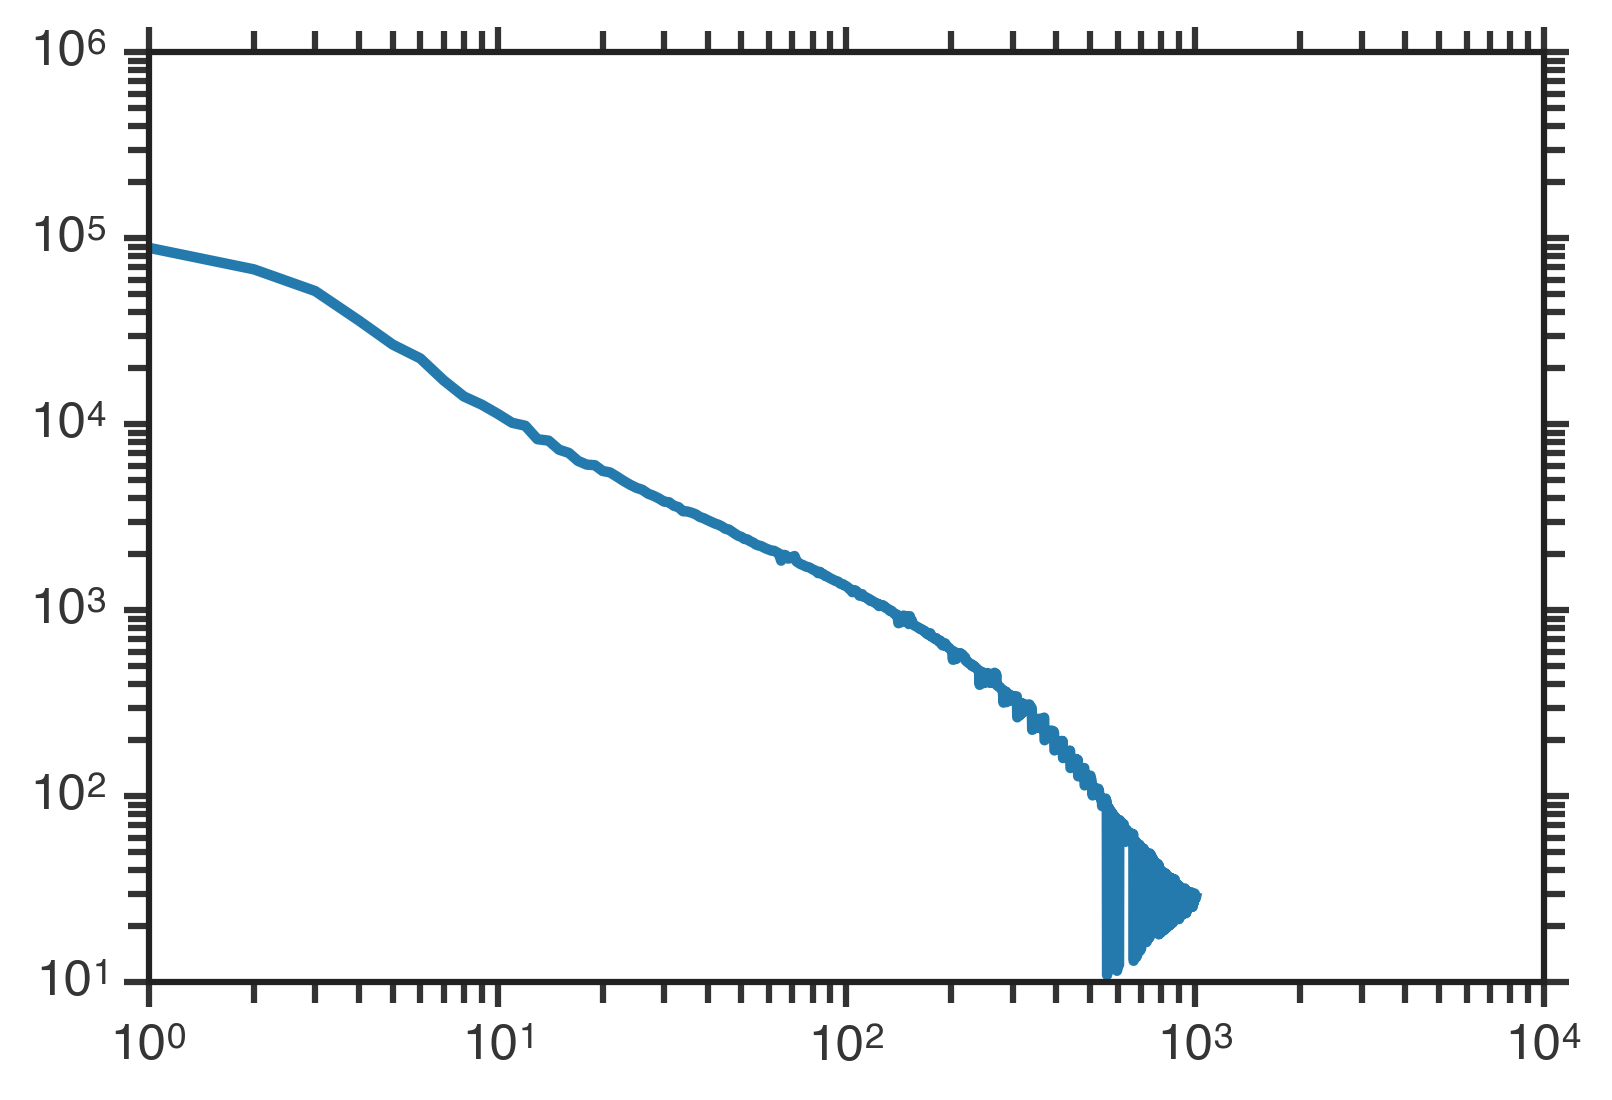

In [26]:
plt.plot(w)
plt.xscale('log')
plt.yscale('log')

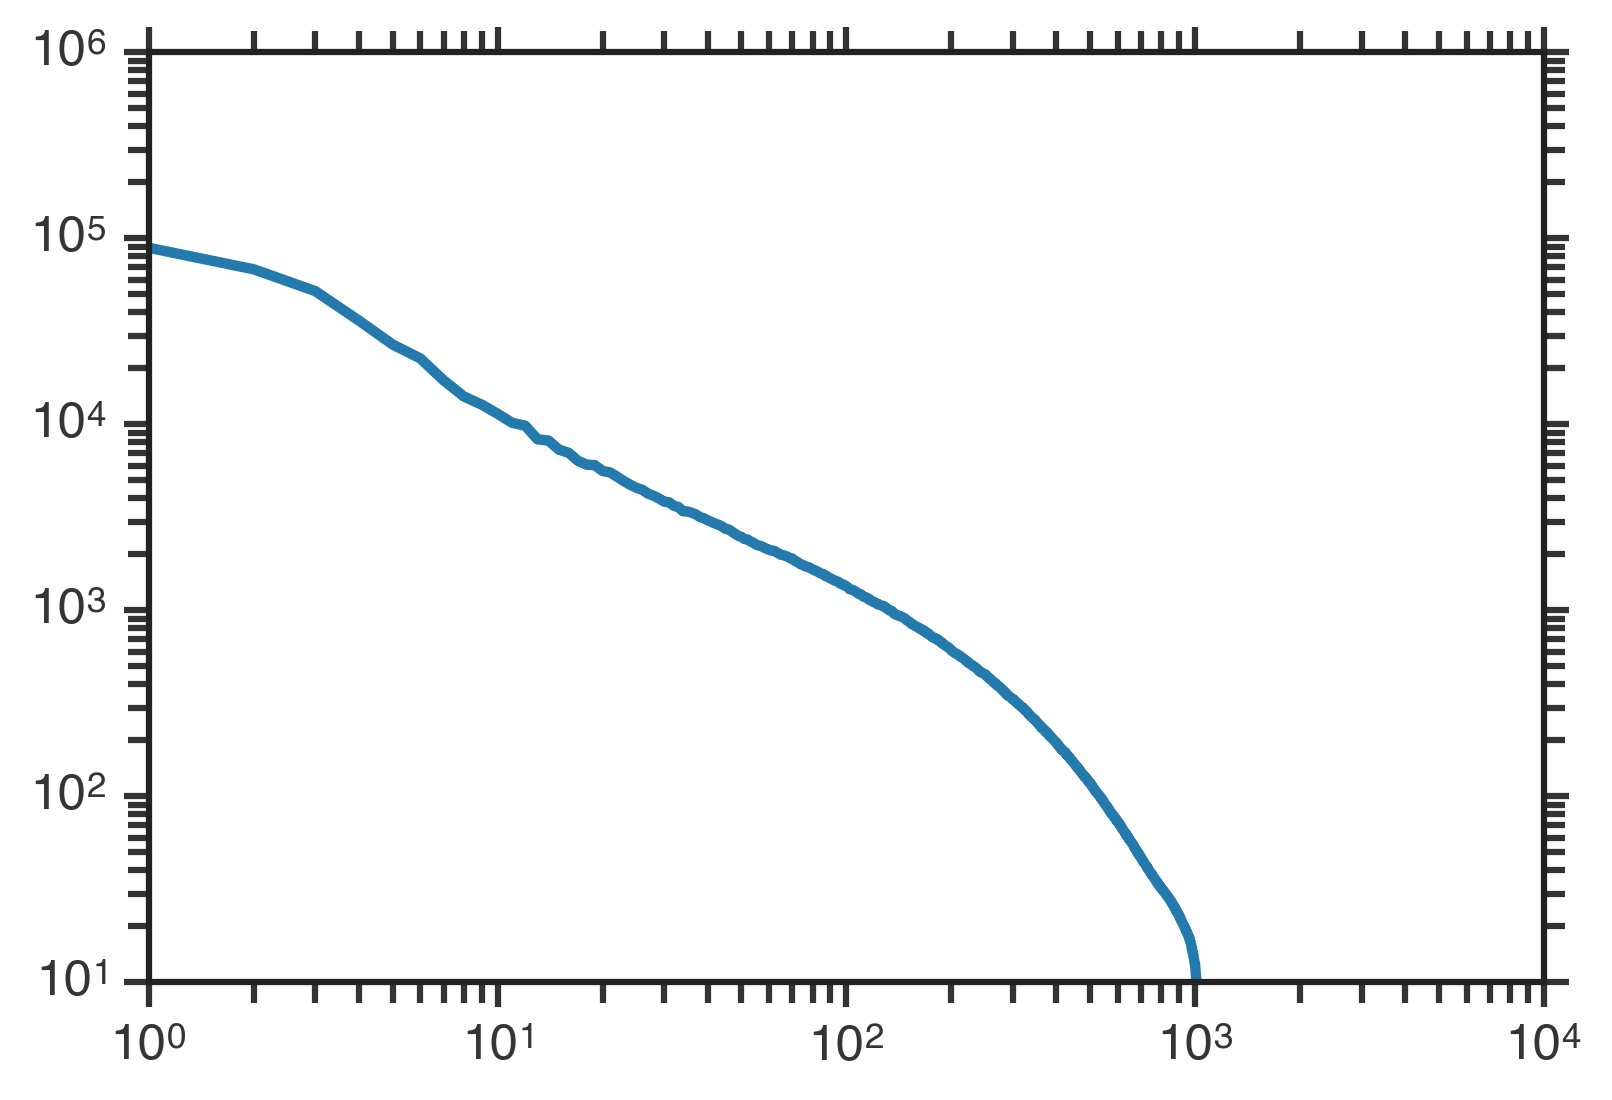

In [28]:
plt.plot(sorted(w, reverse=True))
plt.xscale('log')
plt.yscale('log')

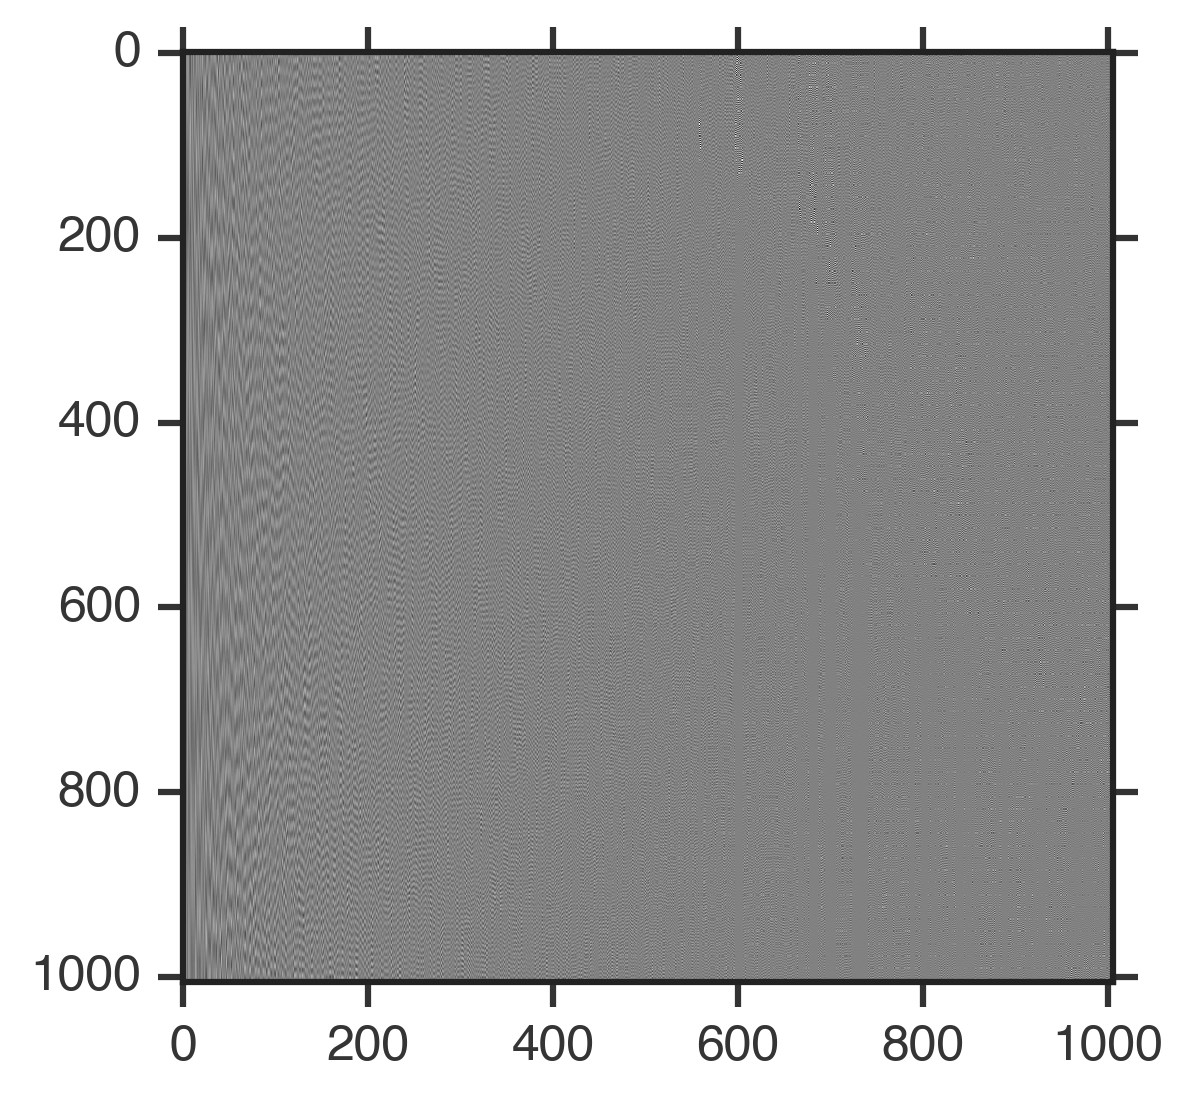

In [25]:
plt.imshow(v)